# Lesson 5
1. Для пороговой сегментации изображения подберите порог эмпирически и с помощью метода Оцу. Сравните результат. Сделайте выводы. 
2. Проведите сегментацию изображения на области построением водоразделов (watershed). Попробуйте сгладить изображения, взять негатив и сравните полученные результаты. Сделайте выводы.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import ndimage
import skimage
from skimage.feature import peak_local_max

## Пороговая фильтрация
Для эмпирического определения порога построим гистограмму.

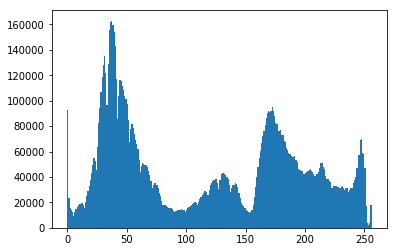

In [2]:
img = cv2.imread('prefect.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

Значение порога для метода Оцу: 116.0


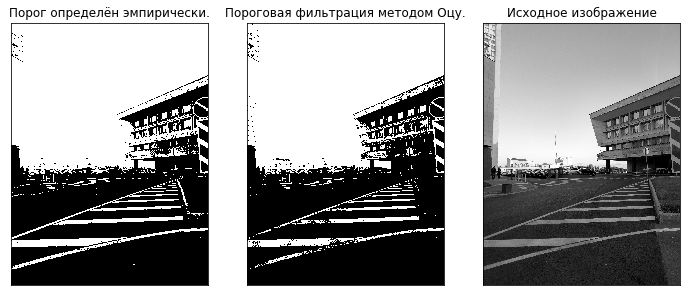

In [3]:
ret, thresh_emp = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
ret, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
print('Значение порога для метода Оцу:', ret)

plt.figure(figsize=(12,16))
plt.subplot(1, 3, 1)
plt.imshow(thresh_emp, 'gray')
plt.title('Порог определён эмпирически.')
plt.xticks([]),plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(thresh_otsu, 'gray')
plt.title('Пороговая фильтрация методом Оцу.')
plt.xticks([]),plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(img, 'gray')
plt.title('Исходное изображение')
plt.xticks([]),plt.yticks([])

plt.show()

__Вывод:__ На картинке неплохо разделяются небо и асфальт. Только из-за зашумленности изображения граница нечёткая. В данном случае метод ОЦУ дал результат не сильно отличающийся от эмпирического определения порога.

## Сегментация изображения на области построением водоразделов.

In [12]:
img = cv2.imread('surfancy.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

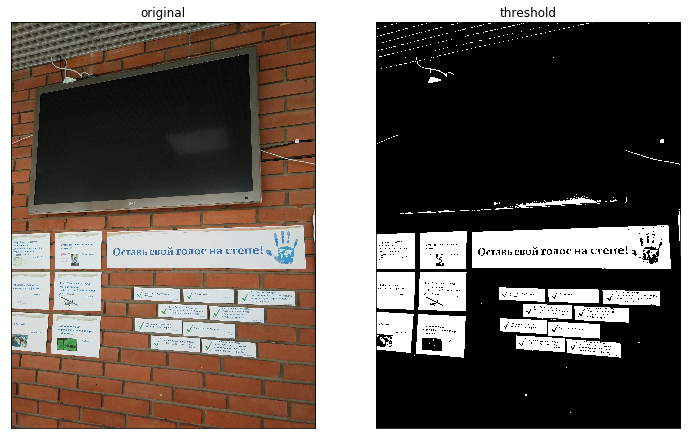

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(rgb, 'gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1, 2, 2)
plt.title('threshold')
plt.imshow(thresh, 'gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)
markers_0 = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
markers_0 = cv2.watershed(img, markers_0)

In [15]:
blur = cv2.GaussianBlur(img,(5,5),0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)
markers_1 = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
markers_1 = cv2.watershed(blur, markers_1)

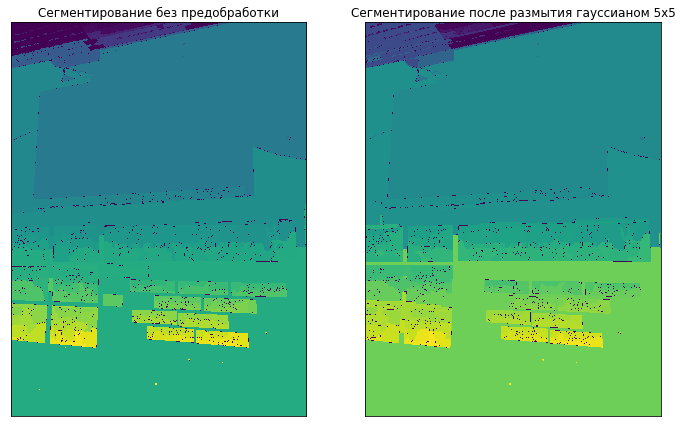

In [16]:
plt.figure(figsize=(18,8))

plt.subplot(131)
plt.title('Сегментирование без предобработки')
plt.imshow(markers_0)
plt.xticks([]),plt.yticks([])

plt.subplot(132)
plt.title('Сегментирование после размытия гауссианом 5х5')
plt.imshow(markers_1)
plt.xticks([]),plt.yticks([])

plt.show()